In [1]:
#Import all the necessary libraries
import torch
import torch.nn
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
import copy
import warnings

# Functions

In [2]:
def Y(energy, f_mode):
    Y = torch.zeros((4, 1))

    #Convert Energy to PeV
    xe = .5 + 20 * (torch.log(energy) - log_01) / (log_10 - log_01)
    xe2 = xe * xe

    #Evaluate Y for given energy and mode
    for i in range(4):
        if f_mode == "mg0":
            Y[i] = torch.exp(PXmg_p[i, 0, 0]) + torch.exp(PXmg_p[i ,0, 1] * torch.pow(xe, PXmg_p[i, 0, 2]))

        elif f_mode == "mg2":
            Y[i] = PXmg_p[i, 2, 0] + PXmg_p[i, 2, 1] * xe + PXmg_p[i, 2, 2] * xe2

        elif f_mode == "eg0":
            Y[i] = PXeg_p[i, 0, 0] + torch.exp(PXeg_p[i, 0, 1] * torch.pow(xe, PXeg_p[i, 0, 2]))

        elif f_mode == "eg1":
            Y[i] = PXeg_p[i, 1, 0] + PXeg_p[i, 1, 1] * xe + PXeg_p[i, 1, 2] * xe2

        elif f_mode == "eg2":
            Y[i] = PXeg_p[i, 2, 0] + PXeg_p[i, 2, 1] * xe + PXeg_p[i, 2, 2] * xe2

        elif f_mode == "mp0":
            Y[i] = torch.exp(PXmp_p[i, 0, 0]) + torch.exp(PXmp_p[i, 0, 1] * torch.pow(xe, PXmp_p[i, 0, 2]))

        elif f_mode == "mp2":
            Y[i] = PXmp_p[i, 2, 0] + PXmp_p[i, 2, 1] * xe + PXmp_p[i, 2, 2] * xe2

        elif f_mode == "ep0":
            Y[i] = torch.exp(PXep_p[i, 0, 0]) + torch.exp(PXep_p[i, 0, 1] * torch.pow(xe, PXep_p[i, 0, 2]))

        elif f_mode == "ep1":
            Y[i] = PXep_p[i, 1, 0] + PXep_p[i, 1, 1] * xe + PXep_p[i, 1, 2] * xe2

        elif f_mode == "ep2":
            Y[i] = PXep_p[i, 2, 0] + PXep_p[i, 2, 1] * xe + PXep_p[i, 2, 2] * xe2

        else:
            warnings.warn("The Mode is not defined")
            return

    return Y

In [3]:
def thisp(energy, theta, f_mode):
    #Find Y values
    Y_val = Y(energy, f_mode)

    #Solve for B
    B = torch.linalg.solve(A, Y_val)

    #Define x from theta
    x = .5 + 4 * theta / theta_max

    res = 0

    for i in range(4):
        res += B[i] * x ** i

    return res

In [4]:
def ReadShowers(path_g, path_p):
    #GAMMA SHOWERS
    #Reading the Electron Parameters in the Showers
    PXeg1_p = np.loadtxt(path_g, max_rows = 3)

    for i in range(3):
        if PXeg1_p[i, 0]*PXeg1_p[i, 1]*PXeg1_p[i, 2] == 0:
            warnings.warn("Encountered 0")
            return

    PXeg2_p = np.loadtxt(path_g, skiprows = 3, max_rows = 3)
    
    for i in range(3):
        if PXeg2_p[i, 0]*PXeg2_p[i, 1]*PXeg2_p[i, 2] == 0:
            warnings.warn("Encountered 0")
            return

    PXeg3_p = np.loadtxt(path_g, skiprows = 6, max_rows = 3)
    
    for i in range(3):
        if PXeg3_p[i, 0]*PXeg3_p[i, 1]*PXeg3_p[i, 2] == 0:
            warnings.warn("Encountered 0")
            return

    PXeg4_p = np.loadtxt(path_g, skiprows = 9, max_rows = 3)
    
    for i in range(3):
        if PXeg4_p[i, 0]*PXeg4_p[i, 1]*PXeg4_p[i, 2] == 0:
            warnings.warn("Encountered 0")
            return
            
    #Reading the Muon Parameters in the Showers
    PXmg1_p = np.loadtxt(path_g, skiprows = 12, max_rows = 3)
    
    for i in range(3):
        if PXmg1_p[i, 0]*PXmg1_p[i, 1]*PXmg1_p[i, 2] == 0 and i != 1:
            warnings.warn("Encountered 0")
            return
            
    PXmg2_p = np.loadtxt(path_g, skiprows = 15, max_rows = 3)
    
    for i in range(3):
        if PXmg2_p[i, 0]*PXmg2_p[i, 1]*PXmg2_p[i, 2] == 0 and i != 1:
            warnings.warn("Encountered 0")
            return

    PXmg3_p = np.loadtxt(path_g, skiprows = 18, max_rows = 3)
    
    for i in range(3):
        if PXmg3_p[i, 0]*PXmg3_p[i, 1]*PXmg3_p[i, 2] == 0 and i != 1:
            warnings.warn("Encountered 0")
            return

    PXmg4_p = np.loadtxt(path_g, skiprows = 21, max_rows = 3)
    
    for i in range(3):
        if PXmg4_p[i, 0]*PXmg4_p[i, 1]*PXmg4_p[i, 2] == 0 and i != 1:
            warnings.warn("Encountered 0")
            return

    #PROTON SHOWERS
    #Reading the Electron Parameters in the Showers
    PXep1_p = np.loadtxt(path_p, max_rows = 3)

    for i in range(3):
        if PXep1_p[i, 0]*PXep1_p[i, 1]*PXep1_p[i, 2] == 0:
            warnings.warn("Encountered 0")
            return

    PXep2_p = np.loadtxt(path_p, skiprows = 3, max_rows = 3)
    
    for i in range(3):
        if PXep2_p[i, 0]*PXep2_p[i, 1]*PXep2_p[i, 2] == 0:
            warnings.warn("Encountered 0")
            return

    PXep3_p = np.loadtxt(path_p, skiprows = 6, max_rows = 3)
    
    for i in range(3):
        if PXep3_p[i, 0]*PXep3_p[i, 1]*PXep3_p[i, 2] == 0:
            warnings.warn("Encountered 0")
            return

    PXep4_p = np.loadtxt(path_p, skiprows = 9, max_rows = 3)
    
    for i in range(3):
        if PXep4_p[i, 0]*PXep4_p[i, 1]*PXep4_p[i, 2] == 0:
            warnings.warn("Encountered 0")
            return
            
    #Reading the Muon Parameters in the Showers
    PXmp1_p = np.loadtxt(path_p, skiprows = 12, max_rows = 3)
    
    for i in range(3):
        if PXmp1_p[i, 0]*PXmp1_p[i, 1]*PXmp1_p[i, 2] == 0 and i != 1:
            warnings.warn("Encountered 0")
            return

    PXmp2_p = np.loadtxt(path_p, skiprows = 15, max_rows = 3)
    
    for i in range(3):
        if PXmp2_p[i, 0]*PXmp2_p[i, 1]*PXmp2_p[i, 2] == 0 and i != 1:
            warnings.warn("Encountered 0")
            return

    PXmp3_p = np.loadtxt(path_p, skiprows = 18, max_rows = 3)
    
    for i in range(3):
        if PXmp3_p[i, 0]*PXmp3_p[i, 1]*PXmp3_p[i, 2] == 0 and i != 1:
            warnings.warn("Encountered 0")
            return

    PXmp4_p = np.loadtxt(path_p, skiprows = 21, max_rows = 3)
    
    for i in range(3):
        if PXmp4_p[i, 0]*PXmp4_p[i, 1]*PXmp4_p[i, 2] == 0 and i != 1:
            warnings.warn("Encountered 0")
            return

    PXmg_p = torch.tensor([PXmg1_p, PXmg2_p, PXmg3_p, PXmg4_p])
    PXeg_p = torch.tensor([PXeg1_p, PXeg2_p, PXeg3_p, PXeg4_p])
    PXmp_p = torch.tensor([PXmp1_p, PXmp2_p, PXmp3_p, PXmp4_p])
    PXep_p = torch.tensor([PXep1_p, PXep2_p, PXep3_p, PXep4_p])

    return PXmg_p, PXeg_p, PXmp_p, PXep_p

In [44]:
#This function parametrize the particle species content from the showers

def ShowerContent(energy, theta, R, f_mode):
    #Check if everything is in the range:
    if R < R_min:
        R = R_min

    if energy < .1 or energy > 10:
        warnings.warn("Energy is out of range!")
        return 0

    if theta < 0 or theta > theta_max:
        warnings.warn("Angle is out of range!")
        return 0
    
    if f_mode == "mg" or f_mode == "mp":
        thisp0 = thisp(energy, theta, f_mode + "0")
        thisp2 = thisp(energy, theta, f_mode + "2")
        
        #Evaluate the  Flux
        flux0 = TankArea * .02 * thisp0 * torch.exp(-1 * torch.pow(R, thisp2))
        flux = flux0 + fluxB_mu

    elif f_mode == "eg" or f_mode == "ep":
        thisp0 = thisp(energy, theta, f_mode + "0")
        thisp1 = thisp(energy, theta, f_mode + "1")
        thisp2 = thisp(energy, theta, f_mode + "2")
        
        #Evaluate the Flux
        flux0 = TankArea * .02 * thisp0 * torch.exp(-thisp1 * torch.pow(R, thisp2))
        flux = flux0 + fluxB_e

    else:
        warnings.warn("Mode is not defined")
        return

    #Evalute the derivatives
    #With respect to R
    dfluxdR = torch.autograd.grad(flux, R, retain_graph = True, create_graph = True)
    d2fluxdR2 = torch.autograd.grad(dfluxdR, R, retain_graph=True, create_graph=True)

    #With respect to energy
    dfluxde = torch.autograd.grad(flux, energy, retain_graph = True, create_graph = True)
    d2fluxde2 = torch.autograd.grad(dfluxde, energy, retain_graph = True, create_graph = True)
    d3fluxde3 = torch.autograd.grad(d2fluxde2, energy, retain_graph=True, create_graph=True)

    d2fluxdedR = torch.autograd.grad(dfluxdR, energy, retain_graph = True, create_graph = True)
    d3fluxde2dR = torch.autograd.grad(d2fluxdedR, energy, retain_graph=True, create_graph=True)

    #With respect to theta
    dfluxdth = torch.autograd.grad(flux, theta, retain_graph = True, create_graph = True)
    d2fluxdth2 = torch.autograd.grad(dfluxdth, theta, retain_graph=True, create_graph=True)
    d2fluxdthdR = torch.autograd.grad(dfluxdR, theta, retain_graph=True, create_graph=True)

    return flux #, dfluxdR, d2fluxdR2, dfluxde, d2fluxde2, d3fluxde3, d2fluxdedR, d3fluxde2dR, dfluxdth, d2fluxdth2, d2fluxdthdR

# Global Variables

In [47]:
#Matrices we use in the functions
PXmg_p, PXeg_p, PXmp_p, PXep_p = ReadShowers("./Fit_Photon_10_pars.txt", "./Fit_Proton_2_pars.txt")
A = torch.tensor([[1, 1, 1, 1],[1, 2, 4, 8], [1, 3, 9, 27], [1, 4, 16, 64]] , dtype = torch.float32)

#Constants
theta_max = np.pi * 65 / 180
log_01 = torch.tensor(np.log(.1), dtype = torch.float32)
log_10 = torch.tensor(np.log(10), dtype = torch.float32)

#Tank Values
R_min = 1
TankRadius = 1.91
TankArea = TankRadius ** 2 *np.pi

#Background
Bgr_mu_per_m2 = 0.000001826
fluxB_mu = TankArea * Bgr_mu_per_m2

Bgr_e_per_m2 = 0.000000200
fluxB_e = TankArea * Bgr_e_per_m2

# Main Routine
We will be using here for debugging as well

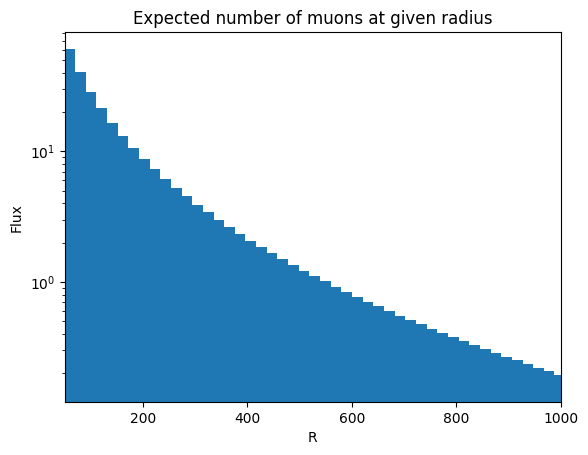

In [48]:
energy = torch.tensor([.5], requires_grad = True)
theta = torch.tensor([.5], requires_grad = True)
R = torch.tensor(np.linspace(50, 1050, 50), requires_grad = True)

fluxes = []

for r in R:
    fluxes.append(ShowerContent(energy, theta, r, "mp").item() * 100)

plt.bar(R.detach().numpy(), fluxes, width=40, align='center')
plt.yscale('log')
plt.ylabel("Flux")
plt.xlabel("R")
plt.title("Expected number of muons at given radius")
plt.xlim((50, 1000))
plt.show()

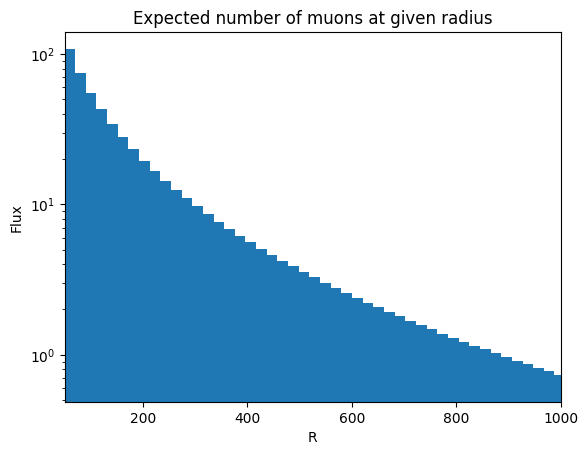

In [50]:
energy = torch.tensor([2.], requires_grad = True)
theta = torch.tensor([1.], requires_grad = True)
R = torch.tensor(np.linspace(50, 1050, 50), requires_grad = True)

fluxes = []

for r in R:
    fluxes.append(ShowerContent(energy, theta, r, "mp").item() * 100)

plt.bar(R.detach().numpy(), fluxes, width=40, align='center')
plt.yscale('log')
plt.ylabel("Flux")
plt.xlabel("R")
plt.title("Expected number of muons at given radius")
plt.xlim((50, 1000))
plt.show()

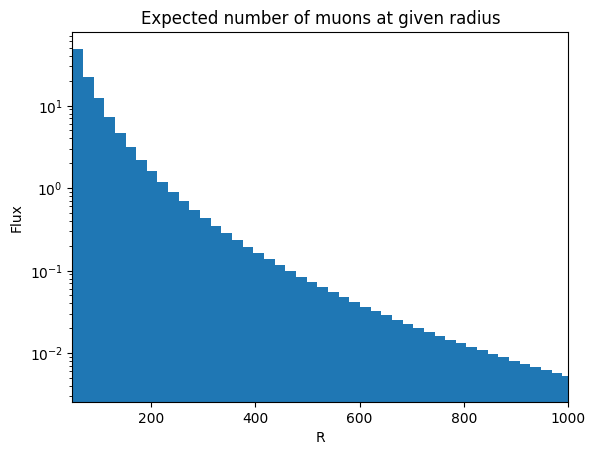

In [51]:
energy = torch.tensor([1.], requires_grad = True)
theta = torch.tensor([.2], requires_grad = True)
R = torch.tensor(np.linspace(50, 1050, 50), requires_grad = True)

fluxes = []

for r in R:
    fluxes.append(ShowerContent(energy, theta, r, "eg").item() * 100)

plt.bar(R.detach().numpy(), fluxes, width=40, align='center')
plt.yscale('log')
plt.ylabel("Flux")
plt.xlabel("R")
plt.title("Expected number of muons at given radius")
plt.xlim((50, 1000))
plt.show()

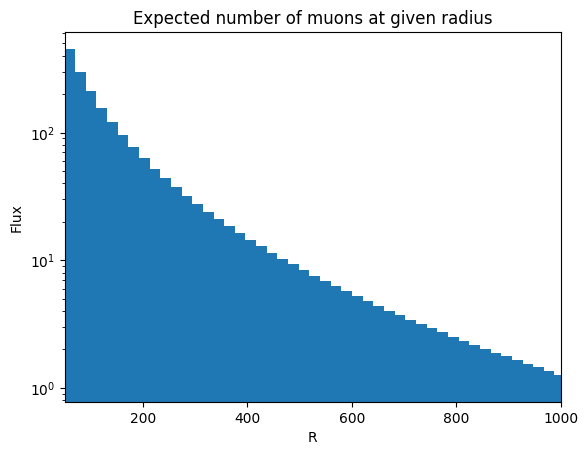

In [52]:
energy = torch.tensor([4.], requires_grad = True)
theta = torch.tensor([.5], requires_grad = True)
R = torch.tensor(np.linspace(50, 1050, 50), requires_grad = True)

fluxes = []

for r in R:
    fluxes.append(ShowerContent(energy, theta, r, "mp").item() * 100)

plt.bar(R.detach().numpy(), fluxes, width=40, align='center')
plt.yscale('log')
plt.ylabel("Flux")
plt.xlabel("R")
plt.title("Expected number of muons at given radius")
plt.xlim((50, 1000))
plt.show()